In [1]:
# (1)데이터 가져오기

from sklearn.datasets import load_diabetes
diabetes=load_diabetes() # diabetes 데이터 가져오기
df_X = diabetes.data # diabetes.data df_X에 저장
df_y = diabetes.target # diabetes.target df_y에 저장
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [2]:
import numpy as np

In [3]:
# (2)모델에 입력할 데이터 X 준비하기
# (3)모델에 예측할 데이터 y 준비하기

X = np.array(df_X) # df_X값 X에 numpy array로 저장
y = np.array(df_y) # df_y값 y에 numpy array로 저장
print(type(X), type(y)) # 타입 확인

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
# (4) train 데이터와 test 데이터로 분리하기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [5]:
# (5) 모델 준비하기
# 가중치 준비
W = np.random.rand(10)
b = np.random.rand()

In [6]:
# model 함수 구현
def model(X, W, b):
    pred = 0
    for i in range(10):
        pred += X[:, i]*W[i]
    pred += b
    return pred

In [7]:
# (6) 손실함수 loss 정의하기

def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X, W, b, y):
    pred = model(X, W ,b)
    L = MSE(pred, y)
    return L

In [8]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [9]:
# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNIG_RATE = 0.3

In [10]:
# (9) 모델 학습하기
losses = []

for i in range(1, 1001):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNIG_RATE * dW
    b -= LEARNIG_RATE * db
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print(f'Iteration {i} : Loss {L:.4f}')

Iteration 10 : Loss 5899.2968
Iteration 20 : Loss 5674.4655
Iteration 30 : Loss 5470.5511
Iteration 40 : Loss 5285.4399
Iteration 50 : Loss 5117.2375
Iteration 60 : Loss 4964.2462
Iteration 70 : Loss 4824.9436
Iteration 80 : Loss 4697.9649
Iteration 90 : Loss 4582.0865
Iteration 100 : Loss 4476.2106
Iteration 110 : Loss 4379.3527
Iteration 120 : Loss 4290.6296
Iteration 130 : Loss 4209.2486
Iteration 140 : Loss 4134.4985
Iteration 150 : Loss 4065.7405
Iteration 160 : Loss 4002.4015
Iteration 170 : Loss 3943.9663
Iteration 180 : Loss 3889.9725
Iteration 190 : Loss 3840.0043
Iteration 200 : Loss 3793.6880
Iteration 210 : Loss 3750.6878
Iteration 220 : Loss 3710.7012
Iteration 230 : Loss 3673.4565
Iteration 240 : Loss 3638.7087
Iteration 250 : Loss 3606.2376
Iteration 260 : Loss 3575.8443
Iteration 270 : Loss 3547.3500
Iteration 280 : Loss 3520.5932
Iteration 290 : Loss 3495.4280
Iteration 300 : Loss 3471.7231
Iteration 310 : Loss 3449.3596
Iteration 320 : Loss 3428.2299
Iteration 330 : L

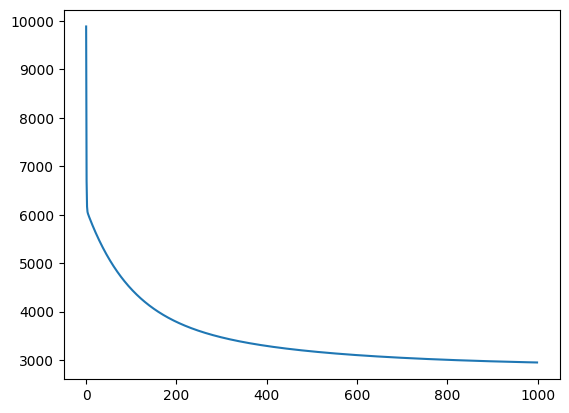

In [11]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [12]:
# (10) test 데이터에 대한 성능 확인하기
pred = model(x_test, W, b)
mse = loss(x_test, W, b, y_test)
mse

2968.4517024655543

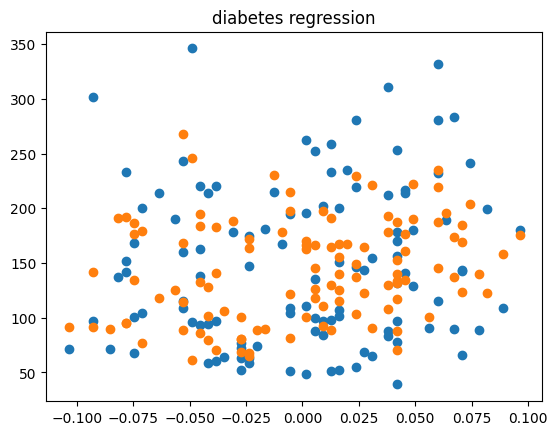

In [13]:
# (11) 정답 데이터와 예측한 데이터 시각화하기

plt.scatter(x_test[:,0], y_test)
plt.scatter(x_test[:,0], pred)
title = plt.title('diabetes regression')
plt.show()